<a href="https://colab.research.google.com/github/Turlinahi/Cake_shop_web_app/blob/main/NNPlab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 93ms/step - accuracy: 0.0389 - loss: 4.3407 - val_accuracy: 0.1388 - val_loss: 3.6865
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 91ms/step - accuracy: 0.1484 - loss: 3.6081 - val_accuracy: 0.1811 - val_loss: 3.4294
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.1977 - loss: 3.3112 - val_accuracy: 0.2150 - val_loss: 3.2265
313/313 - 4s - 11ms/step - accuracy: 0.2150 - loss: 3.2265
Test accuracy: 0.2150000035762787
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
The accuracy is: 0.215
Confusion Matrix is:
[[37  2  0 ...  0  1  1]
 [ 0 33  0 ...  0  0  0]
 [ 6  0  4 ...  1  1  0]
 ...
 [ 0  0  0 ... 15  0  0]
 [ 0  1  0 ...  1  7  0]
 [ 2  0  0 ...  1  1  2]]


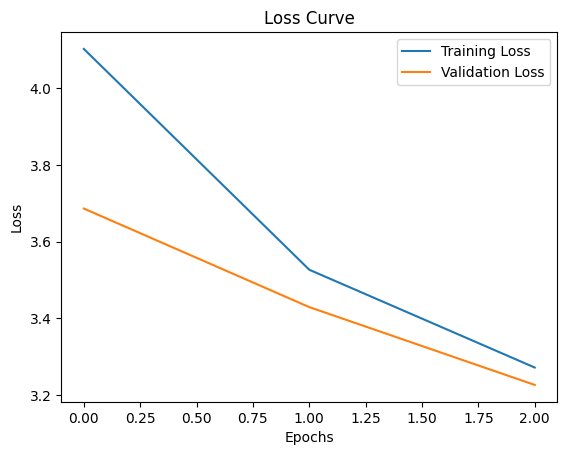

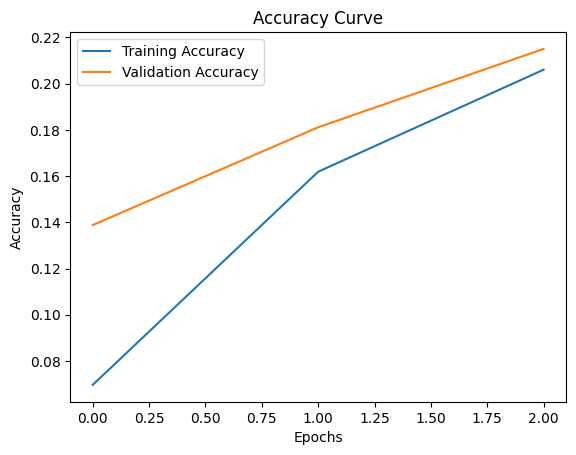

In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np


(xTrain, tTrain), (xTest, tTest) = tf.keras.datasets.cifar100.load_data()

xTrain = xTrain.astype('float32') / 255.0
xTest = xTest.astype('float32') / 255.0


num_classes = 100
tTrain = tf.keras.utils.to_categorical(tTrain, num_classes)
tTest = tf.keras.utils.to_categorical(tTest, num_classes)


model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(xTrain, tTrain, epochs=3,
                    validation_data=(xTest, tTest),
                    batch_size=64, verbose=1)


test_loss, test_acc = model.evaluate(xTest, tTest, verbose=2)
print(f'Test accuracy: {test_acc}')


yTest = model.predict(xTest)
yTest_labels = np.argmax(yTest, axis=1)
tTest_labels = np.argmax(tTest, axis=1)

print('The accuracy is:', accuracy_score(tTest_labels, yTest_labels))
print('Confusion Matrix is:')
print(confusion_matrix(tTest_labels, yTest_labels))

# Plot the loss curve
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [5]:

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Load the CIFAR-100 dataset from Keras
(xTrain, tTrain), (xTest, tTest) = tf.keras.datasets.cifar100.load_data()


xTrain = xTrain.astype('float32') / 255.0
xTest = xTest.astype('float32') / 255.0

# Convert class vectors (labels) to one-hot encoded vectors
num_classes = 100
tTrain = tf.keras.utils.to_categorical(tTrain, num_classes)
tTest = tf.keras.utils.to_categorical(tTest, num_classes)


datagen = ImageDataGenerator(
    rotation_range=20,       # Randomly rotate images by 20 degrees
    width_shift_range=0.2,   # Randomly shift images horizontally by 20%
    height_shift_range=0.2,  # Randomly shift images vertically by 20%
    horizontal_flip=True,    # Randomly flip images horizontally
    zoom_range=0.2           # Randomly zoom in on images
)

# Fit the generator to the training data
datagen.fit(xTrain)

# Define the CNN model
model = models.Sequential()

# Add layers to the model
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using data augmentation
batch_size = 64
history = model.fit(
    datagen.flow(xTrain, tTrain, batch_size=batch_size),  # Using the augmented data
    epochs=10,
    validation_data=(xTest, tTest),
    verbose=1,
    steps_per_epoch=len(xTrain) // batch_size  # Set steps per epoch
)


test_loss, test_acc = model.evaluate(xTest, tTest, verbose=2)
print(f'Test accuracy: {test_acc}')


yTest = model.predict(xTest)
yTest_labels = np.argmax(yTest, axis=1)
tTest_labels = np.argmax(tTest, axis=1)


print('The accuracy is:', accuracy_score(tTest_labels, yTest_labels))
print('Confusion Matrix is:')
print(confusion_matrix(tTest_labels, yTest_labels))

# Plot the loss curve
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 122s 153ms/step - accuracy: 0.0320 - loss: 4.3766 - val_accuracy: 0.1019 - val_loss: 3.8332
Epoch 2/10
  1/781 ━━━━━━━━━━━━━━━━━━━━ 57s 74ms/step - accuracy: 0.0938 - loss: 4.1556

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0938 - loss: 4.1556 - val_accuracy: 0.1049 - val_loss: 3.8318
Epoch 3/10
531/781 ━━━━━━━━━━━━━━━━━━━━ 33s 135ms/step - accuracy: 0.1010 - loss: 3.8431

KeyboardInterrupt: 

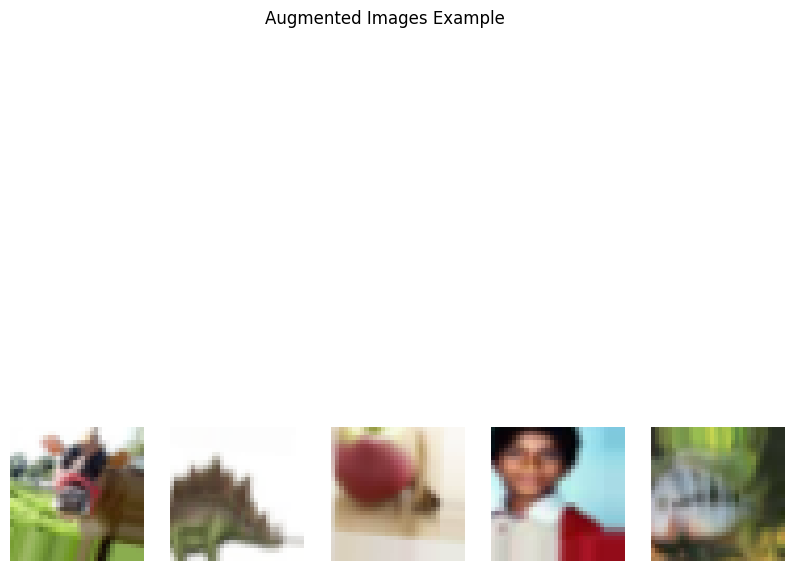

Epoch 1/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 115s 142ms/step - accuracy: 0.0320 - loss: 4.3735 - val_accuracy: 0.1088 - val_loss: 3.8031
Epoch 2/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0625 - loss: 4.1581 - val_accuracy: 0.1027 - val_loss: 3.8552
Epoch 3/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 109s 139ms/step - accuracy: 0.1103 - loss: 3.8072 - val_accuracy: 0.1627 - val_loss: 3.5165
Epoch 4/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2188 - loss: 3.4496 - val_accuracy: 0.1626 - val_loss: 3.5165
Epoch 5/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 111s 142ms/step - accuracy: 0.1461 - loss: 3.5910 - val_accuracy: 0.1960 - val_loss: 3.3385
Epoch 6/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1562 - loss: 3.5146 - val_accuracy: 0.1928 - val_loss: 3.3368
Epoch 7/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 111s 142ms/step - accuracy: 0.1648 - loss: 3.4711 - val_accuracy: 0.2093 - val_loss: 3.2573
Epoch 8/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2031 - loss: 3.2384 - 

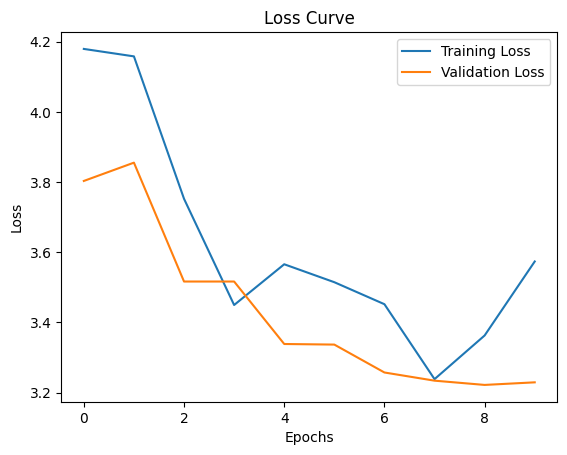

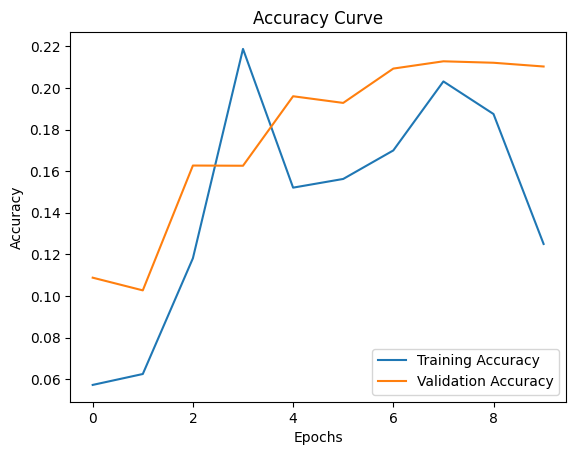

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


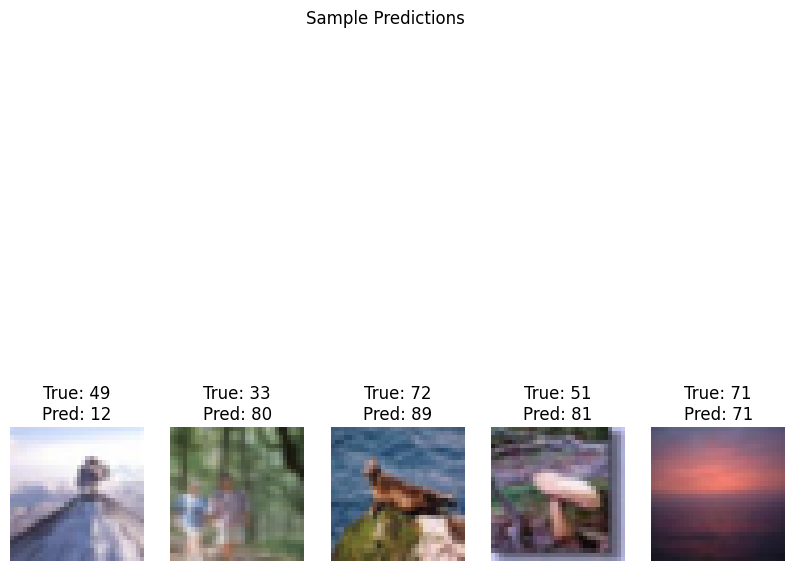

In [6]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Load the CIFAR-100 dataset from Keras
(xTrain, tTrain), (xTest, tTest) = tf.keras.datasets.cifar100.load_data()

# Normalize the images to a [0, 1] range
xTrain = xTrain.astype('float32') / 255.0
xTest = xTest.astype('float32') / 255.0

# Convert class vectors (labels) to one-hot encoded vectors
num_classes = 100
tTrain = tf.keras.utils.to_categorical(tTrain, num_classes)
tTest = tf.keras.utils.to_categorical(tTest, num_classes)

# Define the ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,       # Randomly rotate images by 20 degrees
    width_shift_range=0.2,   # Randomly shift images horizontally by 20%
    height_shift_range=0.2,  # Randomly shift images vertically by 20%
    horizontal_flip=True,    # Randomly flip images horizontally
    zoom_range=0.2           # Randomly zoom in on images
)

# Fit the generator to the training data
datagen.fit(xTrain)

# Plot some augmented images
def plot_augmented_images(data_generator, original_images, num_images=5):
    plt.figure(figsize=(10, 10))
    augmented_images = next(data_generator.flow(original_images, batch_size=num_images))  # Get augmented images
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(augmented_images[i])
        plt.axis('off')
    plt.suptitle('Augmented Images Example')
    plt.show()

# Visualize original and augmented images
sample_images = xTrain[:5]  # Take first 5 images from training set
plot_augmented_images(datagen, sample_images)

# Define the CNN model
model = models.Sequential()

# Add layers to the model
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using data augmentation
batch_size = 64
history = model.fit(
    datagen.flow(xTrain, tTrain, batch_size=batch_size),  # Using the augmented data
    epochs=10,
    validation_data=(xTest, tTest),
    verbose=1,
    steps_per_epoch=len(xTrain) // batch_size  # Set steps per epoch
)

# Evaluate the model
test_loss, test_acc = model.evaluate(xTest, tTest, verbose=2)
print(f'Test accuracy: {test_acc}')

# Predict the labels for test set
yTest = model.predict(xTest)
yTest_labels = np.argmax(yTest, axis=1)
tTest_labels = np.argmax(tTest, axis=1)

# Calculate and print accuracy and confusion matrix
print('The accuracy is:', accuracy_score(tTest_labels, yTest_labels))
print('Confusion Matrix is:')
print(confusion_matrix(tTest_labels, yTest_labels))

# Plot loss curve
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy curve
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot sample predictions
def plot_sample_predictions(model, xTest, tTest_labels, num_images=5):
    plt.figure(figsize=(10, 10))
    predictions = model.predict(xTest[:num_images])
    predicted_labels = np.argmax(predictions, axis=1)
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(xTest[i])
        true_label = tTest_labels[i]
        predicted_label = predicted_labels[i]
        plt.title(f'True: {true_label}\nPred: {predicted_label}')
        plt.axis('off')
    plt.suptitle('Sample Predictions')
    plt.show()

# Plot some sample predictions
plot_sample_predictions(model, xTest, tTest_labels, num_images=5)
